In [39]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
df=pd.read_csv('House_Rent_Dataset_with_nulls.csv')

In [41]:
print(df.isnull().sum())

Posted On            191
BHK                  191
Rent                 191
Size                 191
Floor                191
Area Type            191
Area Locality        191
City                 191
Furnishing Status    191
Tenant Preferred     191
Bathroom             191
Point of Contact     191
dtype: int64


In [42]:
df = df.dropna()          
df = df.dropna(axis=1)

In [43]:
print(df.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [44]:
df['Area Type'].value_counts()

Area Type
Super Area     1309
Carpet Area     864
Built Area        1
Name: count, dtype: int64

In [45]:
df['City'].value_counts()

City
Chennai      480
Bangalore    465
Hyderabad    436
Delhi        325
Kolkata      276
Mumbai       192
Name: count, dtype: int64

In [46]:
df['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    1038
Unfurnished        900
Furnished          236
Name: count, dtype: int64

In [47]:
df.replace({'City':{'Chennai':1,'Bangalore':2,'Hyderabad':3,'Delhi':4,'Kolkata':5,'Mumbai':6}}, inplace=True)
df.replace({'Furnishing Status':{'Semi-Furnished':1,'Unfurnished':2,'Furnished':3}}, inplace=True)
df.replace({'Area Type':{'Super Area':1,'Carpet Area':2,'Built Area':3}}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_26432\2796632638.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'City':{'Chennai':1,'Bangalore':2,'Hyderabad':3,'Delhi':4,'Kolkata':5,'Mumbai':6}}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26432\2796632638.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Furnishing Status':{'Semi-Furnished':1,'Unfurnished':2,'Furnished':3}}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26432\2796632638.py:3: FutureWarning: Downcasting behavior i

In [48]:
x=df.drop(columns=['Posted On','Rent','Area Locality','Tenant Preferred','Floor','Point of Contact'])
y=df['Rent']

In [49]:
x

,BHK,Size,Area Type,City,Furnishing Status,Bathroom
1,2.0,800.0,1,5,1,1.0
4,2.0,850.0,2,5,2,1.0
5,2.0,600.0,1,5,2,2.0
6,2.0,700.0,1,5,2,2.0
7,1.0,250.0,1,5,2,1.0
...,...,...,...,...,...,...
3811,2.0,855.0,2,3,2,2.0
3812,2.0,1040.0,2,3,2,2.0
3814,2.0,1000.0,2,3,1,2.0
3815,3.0,2000.0,1,3,1,3.0


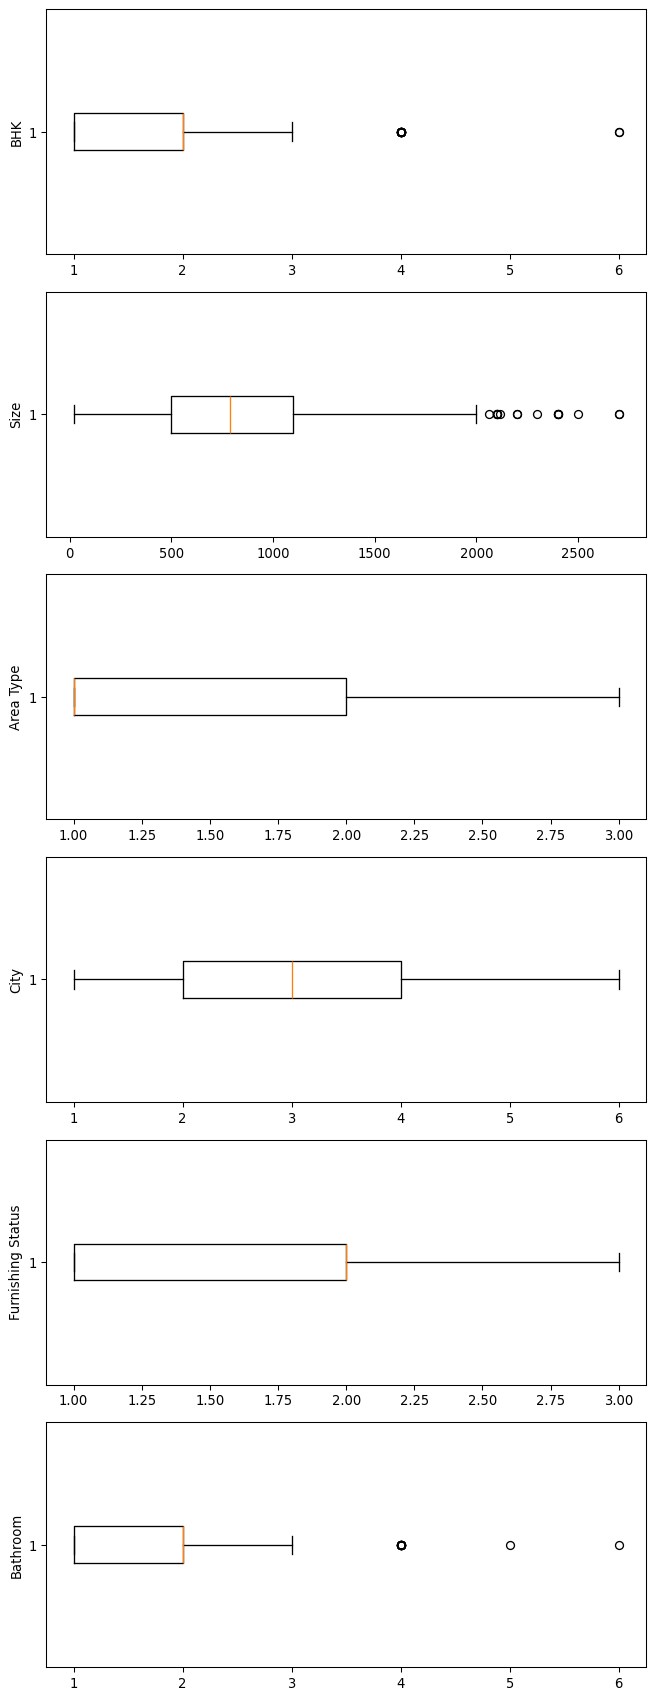

In [50]:
fig, axs =plt.subplots(len(x.columns),1,figsize=(7,18), dpi=95)
for i, col in enumerate(x.columns):
        axs[i].boxplot(x[col] ,vert=False)
        axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [51]:
q1,q3 =np.percentile(df['Size'] , (25,75))
iqr = q3-q1
lower=q1-1.5*iqr
upper =q3+1.5*iqr
x=x[(x['Size']>=lower) & (df['Size']<=upper)]

In [52]:
q1,q3 =np.percentile(df['Bathroom'] , (25,75))
iqr = q3-q1
lower=q1-1.5*iqr
upper =q3+1.5*iqr
x=x[(x['Bathroom']>=lower) & (df['Bathroom']<=upper)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_26432\3413644759.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=x[(x['Bathroom']>=lower) & (df['Bathroom']<=upper)]


In [53]:
q1,q3 =np.percentile(df['BHK'] , (25,75))
iqr = q3-q1
lower=q1-1.5*iqr
upper =q3+1.5*iqr
x=x[(x['BHK']>=lower) & (df['BHK']<=upper)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_26432\833933198.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x=x[(x['BHK']>=lower) & (df['BHK']<=upper)]


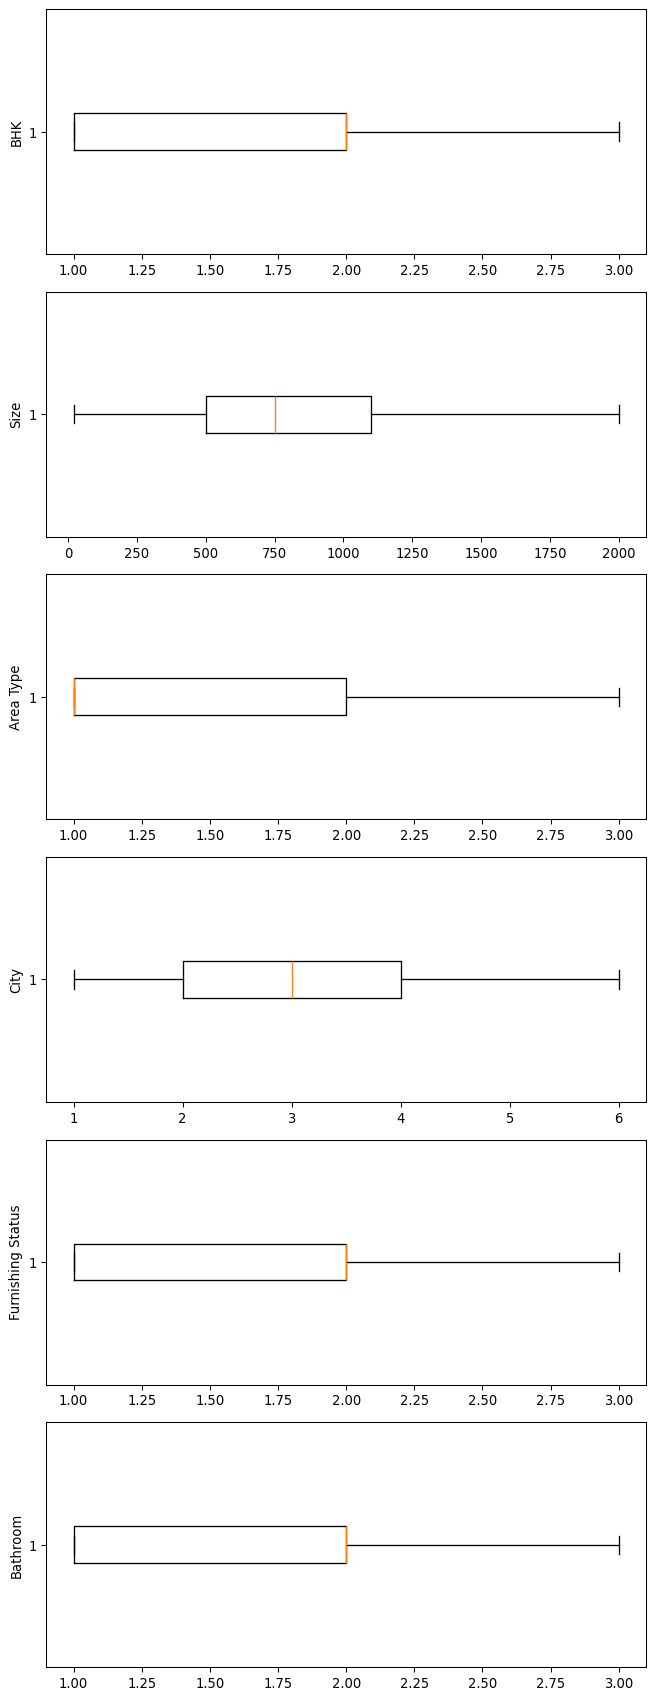

In [54]:
fig, axs =plt.subplots(len(x.columns),1,figsize=(7,18), dpi=95)
for i, col in enumerate(x.columns):
        axs[i].boxplot(x[col] ,vert=False)
        axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [55]:
print(x.shape)
print(y.shape)

(2139, 6)
(2174,)


In [56]:
y = y.loc[x.index]

In [57]:
print(x.shape)
print(y.shape)

(2139, 6)
(2139,)


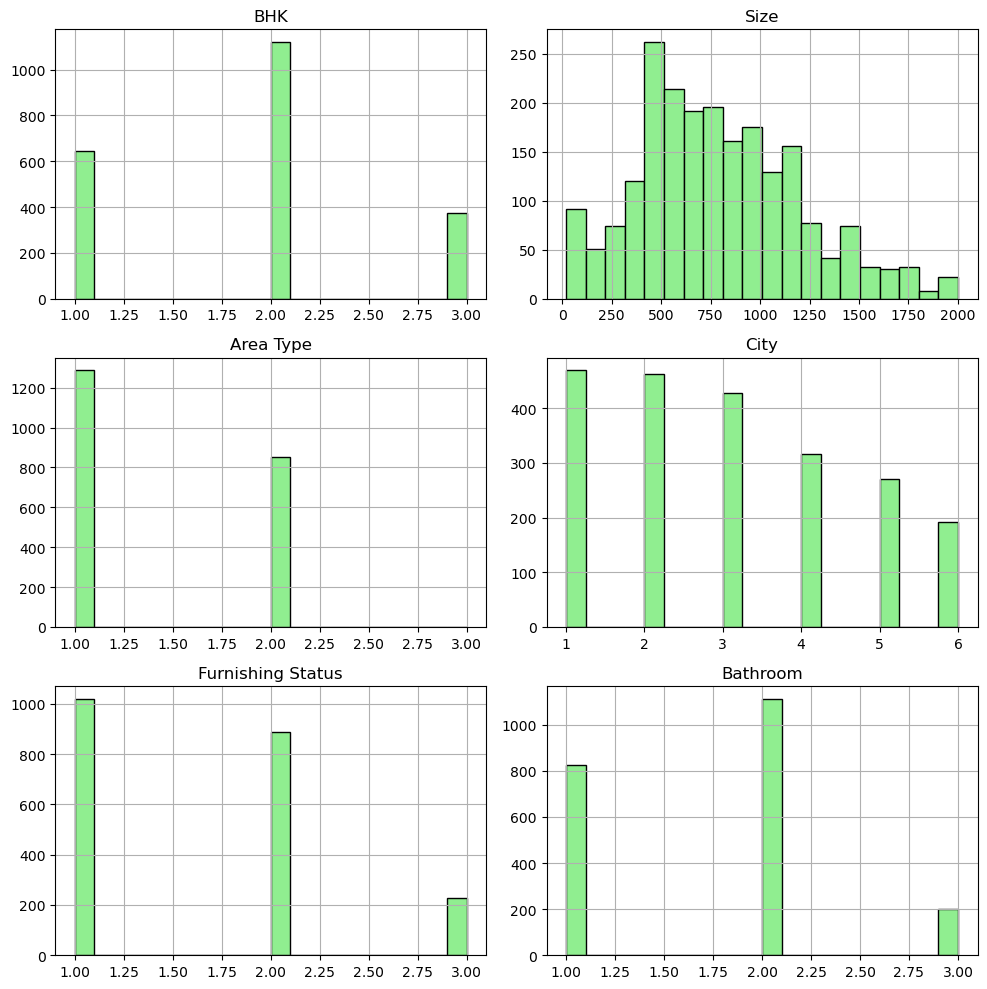

In [58]:
x.hist(figsize=(10, 10), bins=20, color='lightgreen', edgecolor='black')
plt.tight_layout()
plt.show()

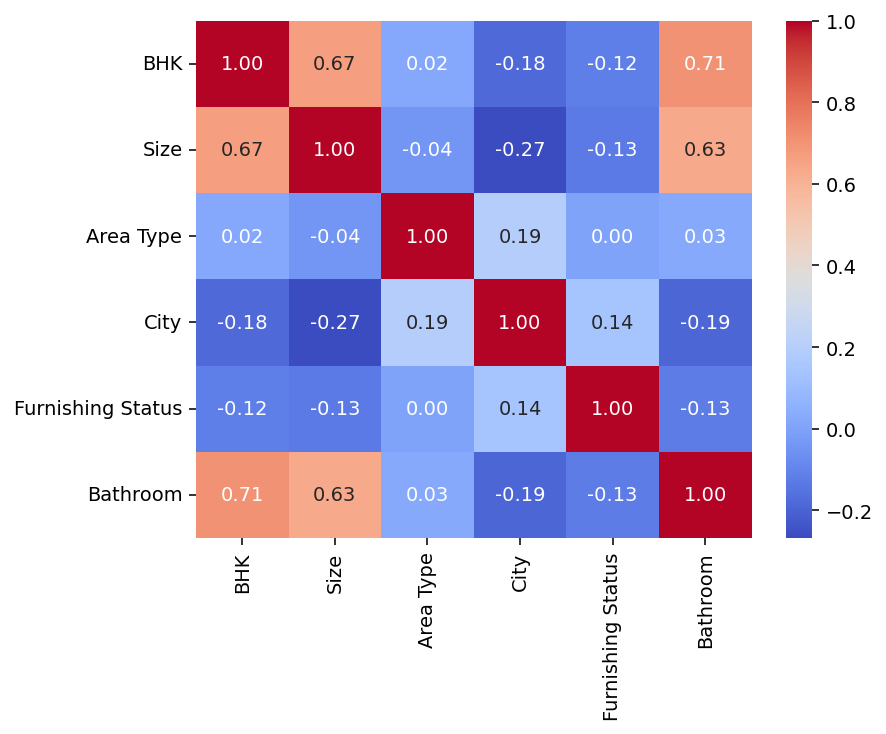

BHK                  1.000000
Bathroom             0.705682
Size                 0.668125
Area Type            0.021895
Furnishing Status   -0.117137
City                -0.179696
Name: BHK, dtype: float64


In [59]:
corr= x.corr()
plt.figure(dpi=140)
sns.heatmap(corr, annot=True, fmt='.2f',cmap='coolwarm')
plt.show()
print(corr['BHK'].sort_values(ascending=False))

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [63]:
lin_reg_model = LinearRegression()

In [64]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [65]:
training_data_prediction =lin_reg_model.predict(x_train)

In [66]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.356499126706721


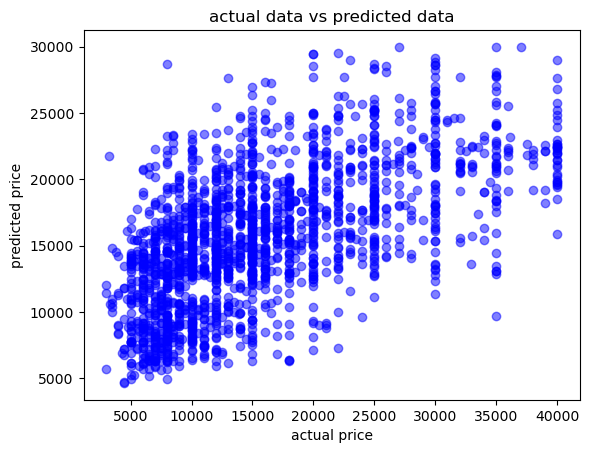

In [67]:
plt.scatter(y_train, training_data_prediction,alpha=0.5, color="blue")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual data vs predicted data")
plt.show()

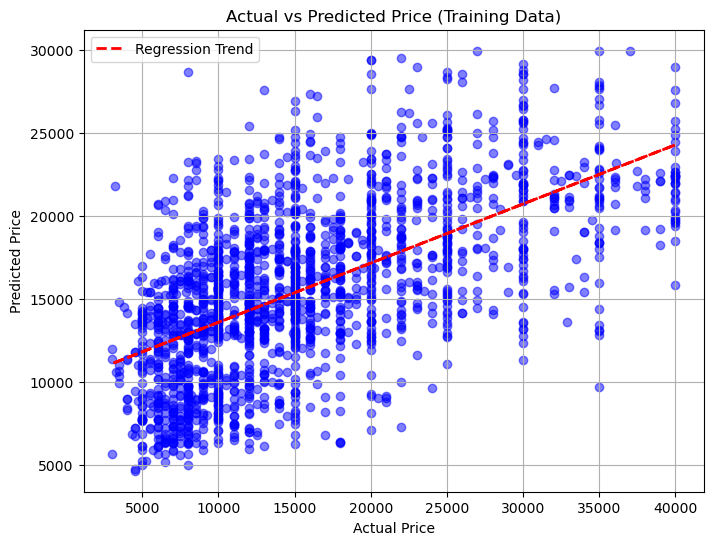

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_data_prediction, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Training Data)")
z = np.polyfit(y_train, training_data_prediction, 1)  
p = np.poly1d(z)
plt.plot(y_train, p(y_train), 'r--', linewidth=2, label="Regression Trend")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
test_data_prediction =lin_reg_model.predict(x_test)

In [78]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.36765516848139623


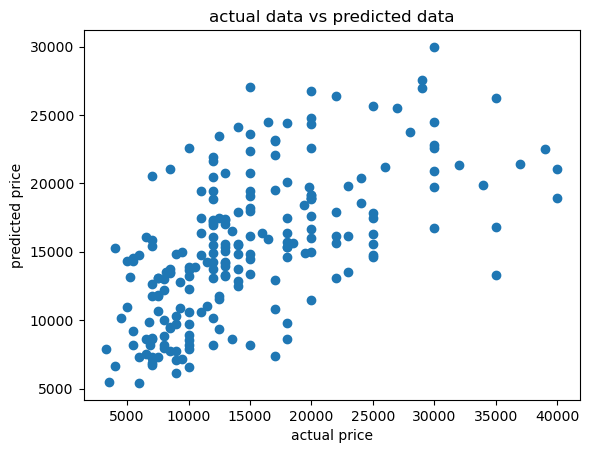

In [79]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual data vs predicted data")
plt.show()

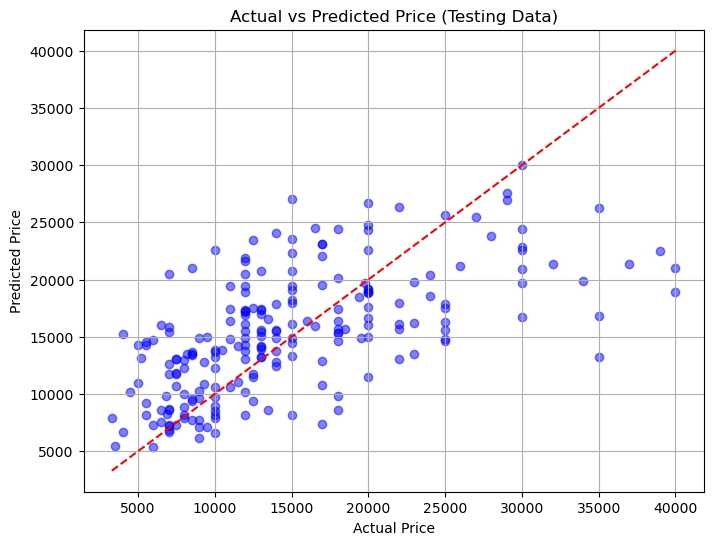

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_data_prediction, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Testing Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()